### Part (b) - ANOVA and PCA

UE23CS342AA2 - Data Analytics

* There are 7 questions in this worksheet.
* Nitheesh Pugazhanthi - nith.pugazhanthi@gmail.com



Name: Nandan D

SRN: PES2UG23CS363

Sec: F

### About the Dataset

* You are a Computational Biologist, and your task is to derive various conclusions on the effects of the new drug discovered to treat cancer patients.
* Each row denotes a patient , which is indexed using their Patient ID.
* From each patient expressions of 15 important genes have been recorded.(Gene_1 to Gene_15)
* The Drug_take column is binary , where 0 indicates  the patient has not taken this new drug and 1 if he/she has taken the drug.
* The Metabolism_Rate column indicates the rate of metabolism of the patient .(0:slow , 1: Normal , 2: fast)
* The Survival_Outcome column is the dependent variable. It indicates how long has the patient survived after diagnosis.

In [53]:
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
if (!requireNamespace("moments", quietly = TRUE)) {
    install.packages("moments") 
}
if (!requireNamespace("readr", quietly = TRUE)) { 
    install.packages("readr")
}

In [54]:
library(tidyverse)
library(moments) 
library(ggplot2)
library(readr)
library(dplyr)

### Section 1 : Anova

* Analysis of Variance (ANOVA) is a hypothesis testing procedure used for comparing means from several groups simultaneously.
* Using an one-way ANOVA, we test whether the mean values of an outcome variable for different levels of a factor are different.
* There are 3 main assumptions which the data must satisfy before proceeding with ANOVA.


*Problem 1*

Do the Metabolism_Rate and the Survival_Outcome columns follow normality assumption required for ANOVA? Verify for each group under the Metabolism Rate using the Q-Q plots. (1 point)

Note : As a bonus (not evaluated), do have a look at shapiro-wilk test from [here](https://www.geeksforgeeks.org/machine-learning/how-to-perform-a-shapiro-wilk-test-in-python/) to statistically infer normality!

In [55]:
df <- read.csv("/kaggle/input/worksheet-1-anova-pca/ws_1_cancer_genes.csv")
head(df)


,Patient_ID,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,Gene_11,Gene_12,Gene_13,Gene_14,Gene_15,Drug_take,Metabolism_Rate,Survival_Outcome
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Patient_1,-0.4484354,0.3649338,-0.40402163,0.2426576,0.3630925,-1.4934319,0.1753014,-0.7433991,-1.5546115,0.97118399,-0.6530681,-0.08442469,0.9689546,0.6267955,0.43932540,0,0,7.745071
2,Patient_2,0.7129715,-0.9183190,0.62516903,1.3055911,-0.2159393,-1.2882794,-0.9693579,-1.6510778,0.1383664,-0.09934064,-3.1493405,1.64678615,-0.2558240,1.8442598,0.65398288,0,2,6.850847
3,Patient_3,2.7286978,-1.3976700,0.05483291,1.4697200,-1.8365415,-1.0036624,-0.6903718,-3.3321979,1.1360566,-1.55869506,-4.8780232,0.74003812,-1.1192256,1.2869179,0.08470301,0,1,8.122306
4,Patient_4,0.2552788,-1.3995476,-0.92136334,1.3437229,0.6520413,-1.4488013,-0.9766864,-0.8646788,0.3479551,0.03613898,-1.3179593,0.79272642,-0.5708378,0.4790770,-0.01680477,0,1,9.457064
5,Patient_5,1.5691419,-2.7606740,1.18104921,0.6251506,2.8793313,-2.8924339,-1.0313157,1.8759262,1.3860988,2.59165427,-0.1293337,-1.65513426,-1.3153171,1.0638036,-1.01054472,0,0,6.648770
6,Patient_6,-2.1911305,-0.2138256,-0.50261152,-0.3591455,1.8084731,-0.8720979,0.3830994,2.3089253,-1.6172275,2.34032531,1.6008836,-1.17305748,0.5416138,-0.8119261,0.12198178,0,0,6.648795


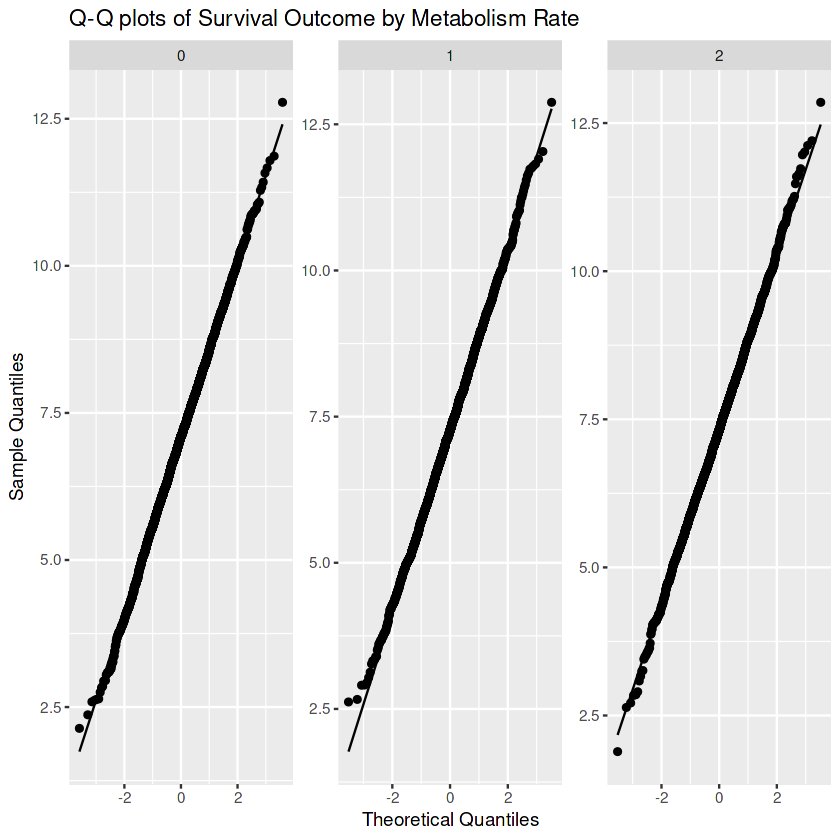

In [56]:
ggplot(df, aes(sample = Survival_Outcome)) +
  stat_qq() +
  stat_qq_line() +
  facet_wrap(~ Metabolism_Rate, scales = "free") +
  labs(
    title = "Q-Q plots of Survival Outcome by Metabolism Rate",
    x = "Theoretical Quantiles",
    y = "Sample Quantiles"
  )

*Problem 2*

Now you need to determine if the metabolism rate has any effect on the patient's survival. How can this be inferred using statistical methods? Name the method and then derive your inference using the same method. Can one use t-test for the same? Why? or Why not ?  (before proceeding do check for heteroscedasticity using levene's test !) (2+1 points)

*NOTE*: Assume the significance level to be 0.05

In [57]:
#your answer here :

#Levene’s test for equal variance

library(car)
leveneTest(Survival_Outcome ~ as.factor(Metabolism_Rate), data = df)

# ANOVA test

anova_model <- aov(Survival_Outcome ~ as.factor(Metabolism_Rate), data = df)
summary(anova_model)

# Why not t-test?

# t-test compares the means of two groups only.
# Here, Metabolism_Rate has 3 or more groups (0,1,2 in your dataset).
# So, t-test is not valid — we need ANOVA (generalization of t-test to multiple groups).


# If assumptions fail

# If normality fails (from Q-Q & Shapiro in Problem 1), or variances are unequal (Levene p ≤ 0.05) → we switch to a non-parametric alternative:
kruskal.test(Survival_Outcome ~ as.factor(Metabolism_Rate), data = df)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,2.328885,0.09747347
,7640,NA,NA


                             Df Sum Sq Mean Sq F value   Pr(>F)    
as.factor(Metabolism_Rate)    2    106   53.04   23.18 9.21e-11 ***
Residuals                  7640  17482    2.29                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Kruskal-Wallis rank sum test

data:  Survival_Outcome by as.factor(Metabolism_Rate)
Kruskal-Wallis chi-squared = 40.92, df = 2, p-value = 1.301e-09


Post Hoc Tests

* When you use ANOVA to test the equality of at least three group means, statistically significant results indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant.

* To identify which particular group's means differ from each other , we use Post Hoc Tests.

* The most common method is Tukey's method.

* If the adjusted p-value between a pair of groups is less than 0.05, then we can assume statistical significance between the pair. (difference !)

* You can learn more about this [here](https://statisticsbyjim.com/anova/post-hoc-tests-anova/)

* NOTE: If p-value is 0.000 then it means that the value too small to be printed out and must be considered as <0.05

*Problem 3*

Perform Tukey's Test to infer which pairs have means statistically significant from one other and which don't. Which pair of categories show a clear difference in the patient's survival ? (1 point)

In [58]:
#your answer here : 
anova_model <- aov(Survival_Outcome ~ as.factor(Metabolism_Rate), data = df)
tukey_result <- TukeyHSD(anova_model)
tukey_result

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Survival_Outcome ~ as.factor(Metabolism_Rate), data = df)

$`as.factor(Metabolism_Rate)`
          diff         lwr       upr     p adj
1-0 0.20494356  0.10674008 0.3031470 0.0000030
2-0 0.26640841  0.16862594 0.3641909 0.0000000
2-1 0.06146485 -0.04288722 0.1658169 0.3510579


### Two Way ANOVA

* Two-way ANOVA is used when the response variable is influenced by several factors.
* Now along with metabolism we want to consider the factor whether the patient has taken this new drug or not.
* Two-way ANOVA tests for 3 conclusions :
    * If the metabolism rate affects the patient's survival ?
    * If the drug has any effect on the patient's survival ?
    * If the interaction between the two independent variables (metabolism rate and drug intake) affects the patient's survival ?


*Problem 4*

Does the interaction between the different metabolism rates and drug intake significantly affect the patient's survival ? Justify your answer.
Based on this study , would recommend this drug based on the patient's metabolism ? 
What would you name this new drug 👀 ? (2 points)

In [59]:
#your answer here : 
df$Metabolism_Rate <- as.factor(df$Metabolism_Rate)
df$Drug_take <- as.factor(df$Drug_take)

two_way_model <- aov(Survival_Outcome ~ Metabolism_Rate * Drug_take, data = df)
summary(two_way_model)

TukeyHSD(anova_model)


                            Df Sum Sq Mean Sq F value   Pr(>F)    
Metabolism_Rate              2    106   53.04  23.204 8.98e-11 ***
Drug_take                    1     26   25.54  11.174 0.000833 ***
Metabolism_Rate:Drug_take    2      1    0.46   0.203 0.816446    
Residuals                 7637  17455    2.29                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Survival_Outcome ~ as.factor(Metabolism_Rate), data = df)

$`as.factor(Metabolism_Rate)`
          diff         lwr       upr     p adj
1-0 0.20494356  0.10674008 0.3031470 0.0000030
2-0 0.26640841  0.16862594 0.3641909 0.0000000
2-1 0.06146485 -0.04288722 0.1658169 0.3510579


## Principal Component Analysis

*Problem 5*

* Explain Dimensionality Reduction and how does it impact the curse of dimensionality ?(think in terms of data sparsity) Perform PCA on the Columns of the gene expression(Gene_1 to Gene_15). Extract how much variance does each principal component explain. How many components should we retain based on the scree plot.(1+1+1 points)

* Examine the loadings of the first two principal components. Which variables contribute most to these components? (1 point)

* Hint 1: Scree Plot is a common method for determining the number of PCs to be retained through a graphical representation. A Scree Plot is a simple line segment plot that shows the eigenvalues for each individual PC.

* Hint 2: In PCA, the contribution of each feature to a principal component is called the loading. Loadings are compared with the absolute value


Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3752 2.0000 1.7794 0.91512 0.56616 0.41582 0.39179
Proportion of Variance 0.3761 0.2667 0.2111 0.05583 0.02137 0.01153 0.01023
Cumulative Proportion  0.3761 0.6428 0.8538 0.90966 0.93103 0.94256 0.95279
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.38064 0.34874 0.3264 0.29776 0.27982 0.26026 0.22822
Proportion of Variance 0.00966 0.00811 0.0071 0.00591 0.00522 0.00452 0.00347
Cumulative Proportion  0.96245 0.97056 0.9777 0.98357 0.98879 0.99331 0.99678
                          PC15
Standard deviation     0.21972
Proportion of Variance 0.00322
Cumulative Proportion  1.00000

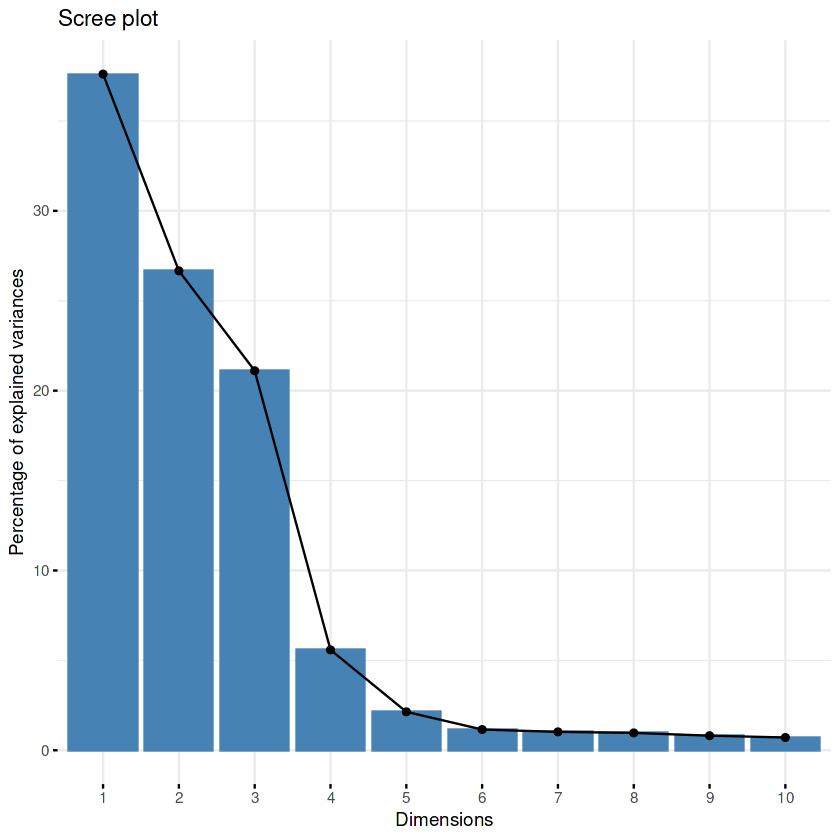

In [64]:
#your answer here : 
library(factoextra)

genes <- df %>% select(Gene_1:Gene_15)
pca_res <- prcomp(genes, scale. = TRUE)

summary(pca_res)

fviz_eig(pca_res)


In [61]:
pca_res$rotation[,1:2]

,PC1,PC2
Gene_1,0.359441039,0.07728767
Gene_2,0.061401226,-0.39681709
Gene_3,0.002940794,0.17975432
Gene_4,0.209836001,0.37062382
Gene_5,-0.281746013,0.14996988
Gene_6,0.092484674,-0.46869794
Gene_7,-0.289028087,-0.09841338
Gene_8,-0.292444174,-0.12796568
Gene_9,0.317550390,-0.12045176
Gene_10,-0.358493212,0.20790410


*Problem 6*

Now for the first and the second Principal Component , find the percentage contribution of each feature to the Principal component.(2 points)

Hint: First find the square of the loadings also known as cos2 values. Find the percentage contribution using these values.

In [62]:
#your answer here : 

cos2 <- pca_res$rotation^2

percent_contrib <- t(t(cos2[,1:2]) / colSums(cos2[,1:2])) * 100
percent_contrib


,PC1,PC2
Gene_1,1.291979e+01,0.5973384
Gene_2,3.770111e-01,15.7463801
Gene_3,8.648267e-04,3.2311617
Gene_4,4.403115e+00,13.7362018
Gene_5,7.938082e+00,2.2490966
Gene_6,8.553415e-01,21.9677756
Gene_7,8.353724e+00,0.9685193
Gene_8,8.552359e+00,1.6375216
Gene_9,1.008383e+01,1.4508628
Gene_10,1.285174e+01,4.3224116


*Problem 7*

Create a circle variable plot using the first two principal components. This Plot helps us visualize which variables are best represented by the principal components. (1 point)

You can use the fviz_pca_var function from the factoextra library for this.

NOTE: Higher the Cos2 value , longer the arrow of the feature.



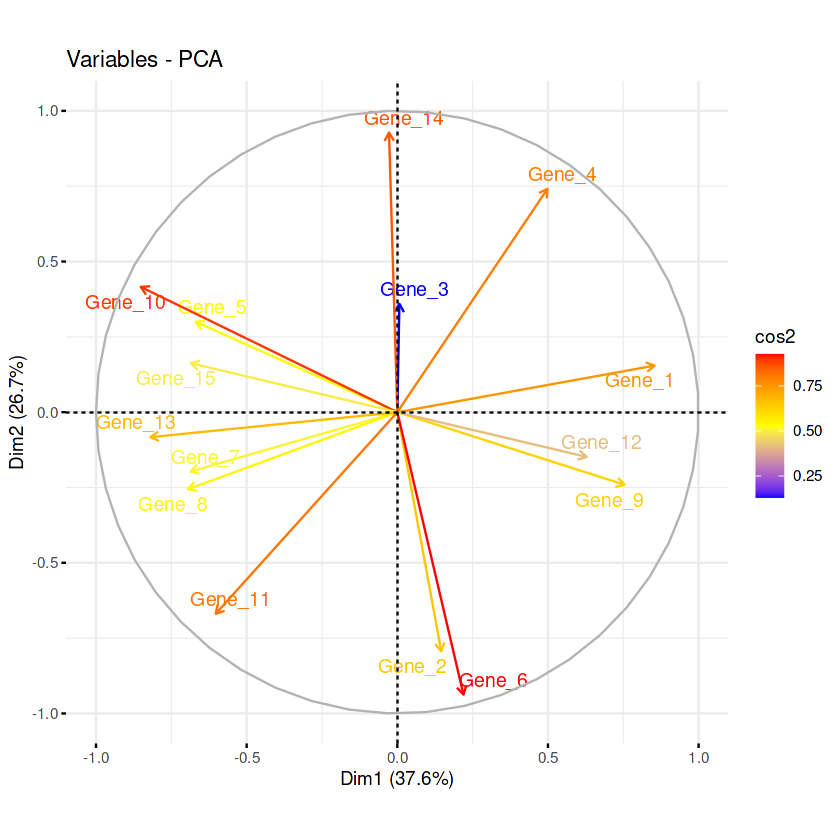

In [63]:
#your answer here : 
fviz_pca_var(pca_res,
             col.var = "cos2",  
             gradient.cols = c("blue","yellow","red"),
             repel = TRUE
            )          


By picking the principal components that retain/express most variance we are able to preserve the patterns of the original dataset , all the while reducing the dataset's size , thus reducing the training time for regressions and classifiers.

*fin*